## STEP 1: IMPORT THE NECESSARY LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression, BayesianRidge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor

---
## STEP 2: READ THE DATA FROM THE CSV FILES
- [Dataset was downloaded from ourworldindata.org](https://ourworldindata.org/grapher/mental-and-substance-use-as-share-of-disease)


In [3]:
df1 = pd.read_csv('mental-and-substance-use-as-share-of-disease.csv')
df2 = pd.read_csv('prevalence-by-mental-and-substance-use-disorder.csv')

---
## STEP 3: FILL MISSING VALUES IN NUMERIC COLUMNS OF DATAFRAMES df1 AND df2 WITH THE MEAN OF THEIR RESPECTIVE COLUMNS

In [4]:
numeric_columns = df1.select_dtypes(include=[np.number]).columns
df1[numeric_columns] = df1[numeric_columns].fillna(df1[numeric_columns].mean())

numeric_columns = df2.select_dtypes(include=[np.number]).columns
df2[numeric_columns] = df2[numeric_columns].fillna(df2[numeric_columns].mean())

In [5]:
df1.count

<bound method DataFrame.count of            Entity Code  Year  \
0     Afghanistan  AFG  1990   
1     Afghanistan  AFG  1991   
2     Afghanistan  AFG  1992   
3     Afghanistan  AFG  1993   
4     Afghanistan  AFG  1994   
...           ...  ...   ...   
6835     Zimbabwe  ZWE  2015   
6836     Zimbabwe  ZWE  2016   
6837     Zimbabwe  ZWE  2017   
6838     Zimbabwe  ZWE  2018   
6839     Zimbabwe  ZWE  2019   

      DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)  
0                                                  1.70                                                
1                                                  1.73                                                
2                                                  1.79                                                
3                                                  1.78                                                
4                                                  1.71       

In [6]:
df1.dropna(inplace=True)
df2.dropna(inplace=True)


---
## STEP 4: CONVERT DATA TYPES

In [7]:
df1['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'] = df1['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'].astype(float)
df2['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Eating disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Eating disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)'] = df2['Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)'].astype(float)
df2['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)'] = df2['Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)'].astype(float)

---
## STEP 5: MERGE THE TWO DATAFRAMES ON A COMMON COLUMN

In [8]:
merged_df = pd.merge(df1, df2, on=['Entity', 'Code', 'Year'])

---
## STEP 6: FEATURE THE MATRIX X AND THE VARIABLE y

In [9]:
X = merged_df[['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Eating disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
               'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)']]

y = merged_df['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)']

---
## STEP 7: SPLIT THE DATA INTO TRAINING AND TESTING SETS

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

---
## STEP 8: VISUALISING THE CORRELATION HEATMAP OF DISEASES AND MENTAL FITNESS

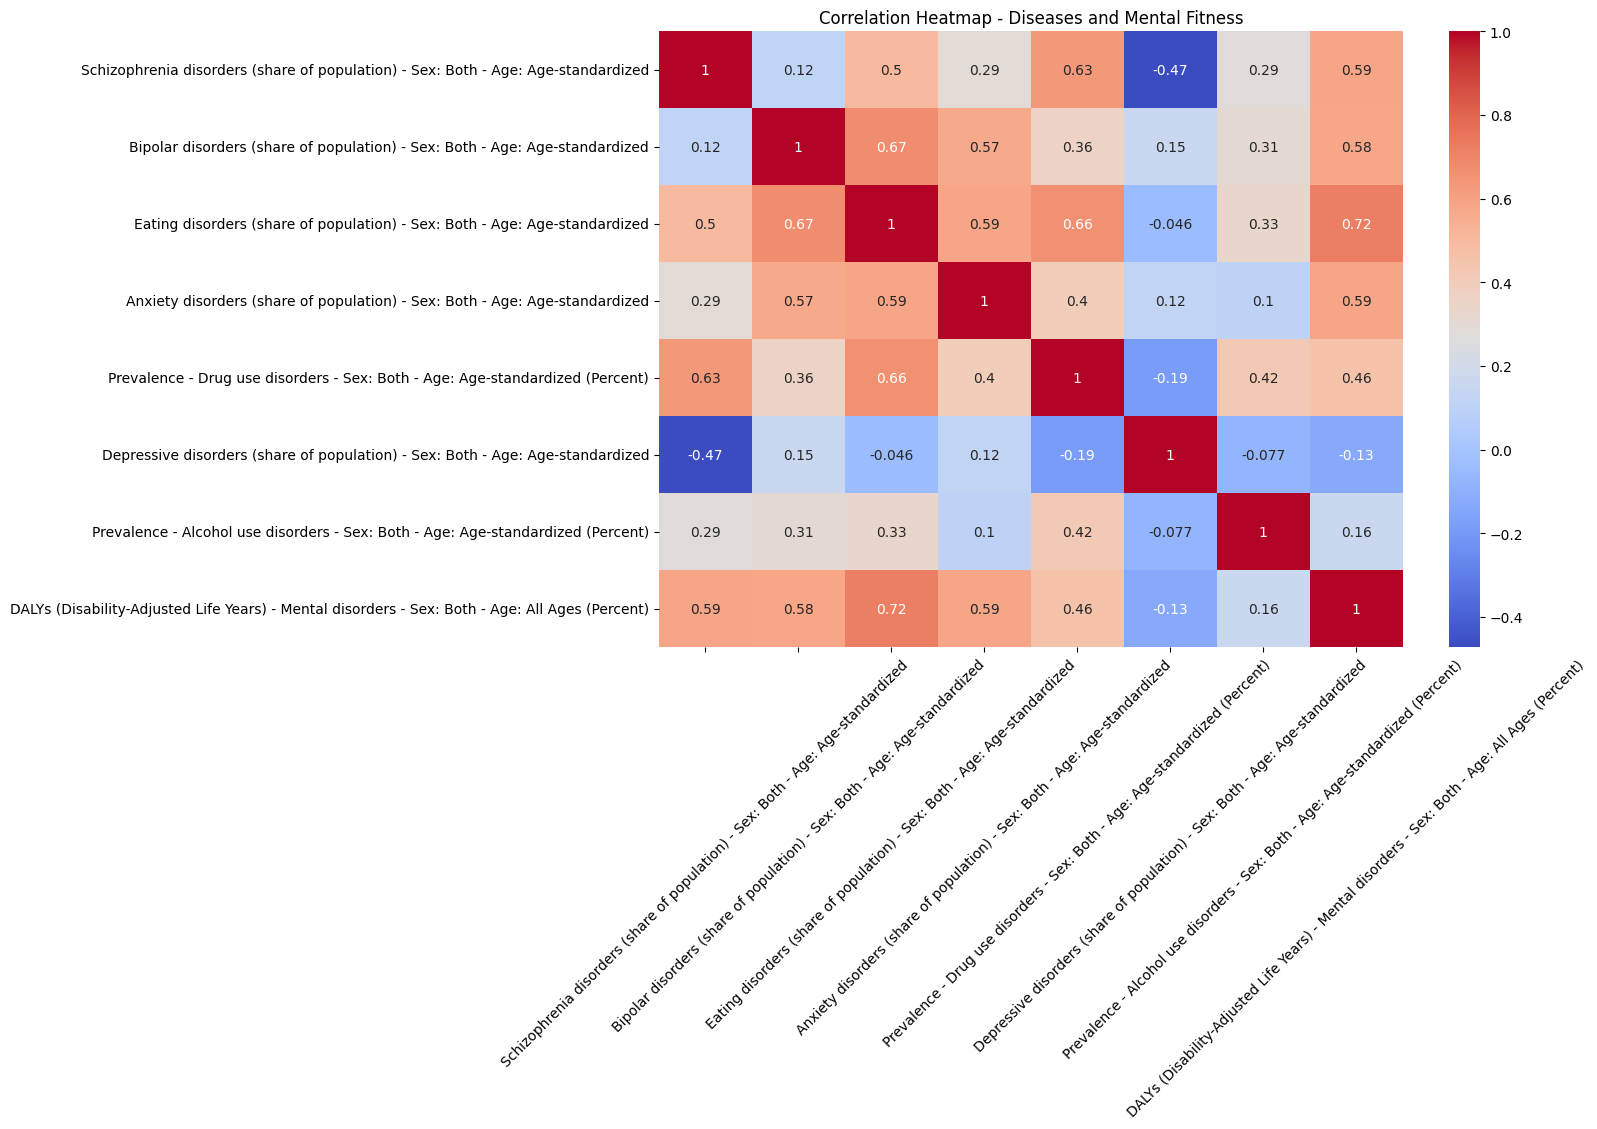

In [11]:
# Compute the correlation matrix
corr_matrix = merged_df[['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
                         'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
                         'Eating disorders (share of population) - Sex: Both - Age: Age-standardized',
                         'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
                         'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
                         'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
                         'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)',
                         'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'
                        ]].corr()

# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Diseases and Mental Fitness')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

---
## STEP 9: FIT THE LINEAR REGRESSION MODEL

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

--- 
## STEP 10: MAKE A PREDICTION USING TRAINED MODEL

In [13]:
y_pred = model.predict(X_test)

In [14]:
import json
with open('fetchedData\input.json', 'r') as json_file:
    data = json.load(json_file)
data.popitem()

# Convert the string values to floats
data = {key: float(value) for key, value in data.items()}

# Create a DataFrame
new_data = pd.DataFrame({
    'Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized': [data['schizophrenia']],
    'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized': [data['bipolar']],
    'Eating disorders (share of population) - Sex: Both - Age: Age-standardized': [data['eating']],
    'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized': [data['anxiety']],
    'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)': [data['drugUse']],
    'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': [data['depressive']],
    'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)': [data['alcoholUse']]
})




In [15]:
model1 = Ridge()
model1.fit(X_train, y_train)
predicted_output1 = model1.predict(new_data)
output_value1=float(predicted_output1[0])

model2 = Lasso()
model2.fit(X_train, y_train)
predicted_output2 = model2.predict(new_data)
output_value2=float(predicted_output2[0])

model3 = ElasticNet()
model3.fit(X_train, y_train)
predicted_output3 = model3.predict(new_data)
output_value3=float(predicted_output3[0])

model4 = LinearRegression()
model4.fit(X_train, y_train)
predicted_output4 = model4.predict(new_data)
output_value4=float(predicted_output4[0])

model5 = BayesianRidge()
model5.fit(X_train, y_train)
predicted_output5 = model5.predict(new_data)
output_value5=float(predicted_output5[0])

model6 = SVR()
model6.fit(X_train, y_train)
predicted_output6 = model6.predict(new_data)
output_value6=float(predicted_output6[0])

model7 = DecisionTreeRegressor()
model7.fit(X_train, y_train)
predicted_output7 = model7.predict(new_data)
output_value7=float(predicted_output7[0])

model8 = RandomForestRegressor()
model8.fit(X_train, y_train)
predicted_output8 = model8.predict(new_data)
output_value8=float(predicted_output8[0])

model9 = XGBRegressor()
model9.fit(X_train, y_train)
predicted_output9 = model9.predict(new_data)
output_value9=float(predicted_output9[0])

model10 = KNeighborsRegressor()
model10.fit(X_train, y_train)
predicted_output10 = model10.predict(new_data)
output_value10=float(predicted_output10[0])

model11 = MLPRegressor()
model11.fit(X_train, y_train)
predicted_output11 = model11.predict(new_data)
output_value11=float(predicted_output11[0])

model12 = GradientBoostingRegressor()
model12.fit(X_train, y_train)
predicted_output12 = model12.predict(new_data)
output_value12=float(predicted_output12[0])


# Create a dictionary with the corrected output value
output_dict = {'Ridge Regression': output_value1,
    'Lasso Regression': output_value2,
    'Elastic Net Regression': output_value3,
    'Linear Regression': output_value4,
    'Bayesian Regression': output_value5,
    'SVR': output_value6,
    'Decision Tree Regression': output_value7,
    'Random Forest Regression': output_value8,
    'XGBoost Regression': output_value9,
    'K-Nearest Neighbors Regression': output_value10,
    'MLP Regression': output_value11,
    'Gradient Boosting Regression': output_value12}

print(output_dict)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Ridge Regression': 11.873673424968693, 'Lasso Regression': 3.505612817587643, 'Elastic Net Regression': 2.8830400032412684, 'Linear Regression': 13.311175037912395, 'Bayesian Regression': 13.290350748394168, 'SVR': 5.686943850173018, 'Decision Tree Regression': 13.37, 'Random Forest Regression': 11.408499999999997, 'XGBoost Regression': 9.98183822631836, 'K-Nearest Neighbors Regression': 5.002, 'MLP Regression': 10.176528589284164, 'Gradient Boosting Regression': 9.803537155102706}


In [16]:
output_file_path = "data.json"


# Write the data to a JSON file
with open(output_file_path, 'w') as json_file:
    json.dump(output_dict, json_file)

---
# STEP 11: PRINTING MODEL PERFOMANCE METRICS

In [17]:
# Create a dictionary to store the model performance
model_performance = {}

# Ridge Regression
ridge_model = Ridge(alpha=0.5)
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
ridge_r2 = r2_score(y_test, ridge_y_pred)
model_performance['1. Ridge Regression'] = {'MSE': ridge_mse, 'R-squared': ridge_r2}

# Lasso Regression
lasso_model = Lasso(alpha=0.5)
lasso_model.fit(X_train, y_train)
lasso_y_pred = lasso_model.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
lasso_r2 = r2_score(y_test, lasso_y_pred)
model_performance['2. Lasso Regression'] = {'MSE': lasso_mse, 'R-squared': lasso_r2}

# Elastic Net Regression
elastic_net_model = ElasticNet(alpha=0.5, l1_ratio=0.5)
elastic_net_model.fit(X_train, y_train)
elastic_net_y_pred = elastic_net_model.predict(X_test)
elastic_net_mse = mean_squared_error(y_test, elastic_net_y_pred)
elastic_net_r2 = r2_score(y_test, elastic_net_y_pred)
model_performance['3. Elastic Net Regression'] = {'MSE': elastic_net_mse, 'R-squared': elastic_net_r2}

# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)
X_test_poly = poly_features.transform(X_test)
poly_y_pred = poly_model.predict(X_test_poly)
poly_mse = mean_squared_error(y_test, poly_y_pred)
poly_r2 = r2_score(y_test, poly_y_pred)
model_performance['4. Polynomial Regression'] = {'MSE': poly_mse, 'R-squared': poly_r2}

# Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_y_pred = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_y_pred)
tree_r2 = r2_score(y_test, tree_y_pred)
model_performance['5. Decision Tree Regression'] = {'MSE': tree_mse, 'R-squared': tree_r2}

# Random Forest Regression
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_y_pred = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_y_pred)
forest_r2 = r2_score(y_test, forest_y_pred)
model_performance['6. Random Forest Regression'] = {'MSE': forest_mse, 'R-squared': forest_r2}

# SVR (Support Vector Regression)
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_y_pred = svr_model.predict(X_test)
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)
model_performance['7. Support Vector Regression'] = {'MSE': svr_mse, 'R-squared': svr_r2}

# XGBoost Regression
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
model_performance['8. XGBoost Regression'] = {'MSE': xgb_mse, 'R-squared': xgb_r2}

# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)
model_performance['9. K-Nearest Neighbors Regression'] = {'MSE': knn_mse, 'R-squared': knn_r2}

# Bayesian Regression
bayesian_model = BayesianRidge()
bayesian_model.fit(X_train, y_train)
bayesian_y_pred = bayesian_model.predict(X_test)
bayesian_mse = mean_squared_error(y_test, bayesian_y_pred)
bayesian_r2 = r2_score(y_test, bayesian_y_pred)
model_performance['10. Bayesian Regression'] = {'MSE': bayesian_mse, 'R-squared': bayesian_r2}

# Neural Network Regression
nn_model = MLPRegressor(max_iter=1000)
nn_model.fit(X_train, y_train)
nn_y_pred = nn_model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_y_pred)
nn_r2 = r2_score(y_test, nn_y_pred)
model_performance['11. Neural Network Regression'] = {'MSE': nn_mse, 'R-squared': nn_r2}

# Gradient Boosting Regression
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)
model_performance['12. Gradient Boosting Regression'] = {'MSE': gb_mse, 'R-squared': gb_r2}

# Print model performance
for model, performance in model_performance.items():
    print(f"Model: {model}")
    print("   Mean Squared Error (MSE):", performance['MSE'])
    print("   R-squared Score:", performance['R-squared'])
    print()


Model: 1. Ridge Regression
   Mean Squared Error (MSE): 1.6424189657272814
   R-squared Score: 0.7175346132447258

Model: 2. Lasso Regression
   Mean Squared Error (MSE): 4.005093618877548
   R-squared Score: 0.3111987004202821

Model: 3. Elastic Net Regression
   Mean Squared Error (MSE): 3.8493320735588066
   R-squared Score: 0.33798677706708036

Model: 4. Polynomial Regression
   Mean Squared Error (MSE): 0.9016087100702074
   R-squared Score: 0.8449401411538542

Model: 5. Decision Tree Regression
   Mean Squared Error (MSE): 0.08297390243902439
   R-squared Score: 0.9857300384785467

Model: 6. Random Forest Regression
   Mean Squared Error (MSE): 0.04812424937398386
   R-squared Score: 0.9917235279210805

Model: 7. Support Vector Regression
   Mean Squared Error (MSE): 1.660381282767541
   R-squared Score: 0.7144454301948021

Model: 8. XGBoost Regression
   Mean Squared Error (MSE): 0.06196520508643635
   R-squared Score: 0.9893431420451483

Model: 9. K-Nearest Neighbors Regression

---
## STEP 12: PLOTTING PREDECTED vs ACTUAL VALUES GRAPH

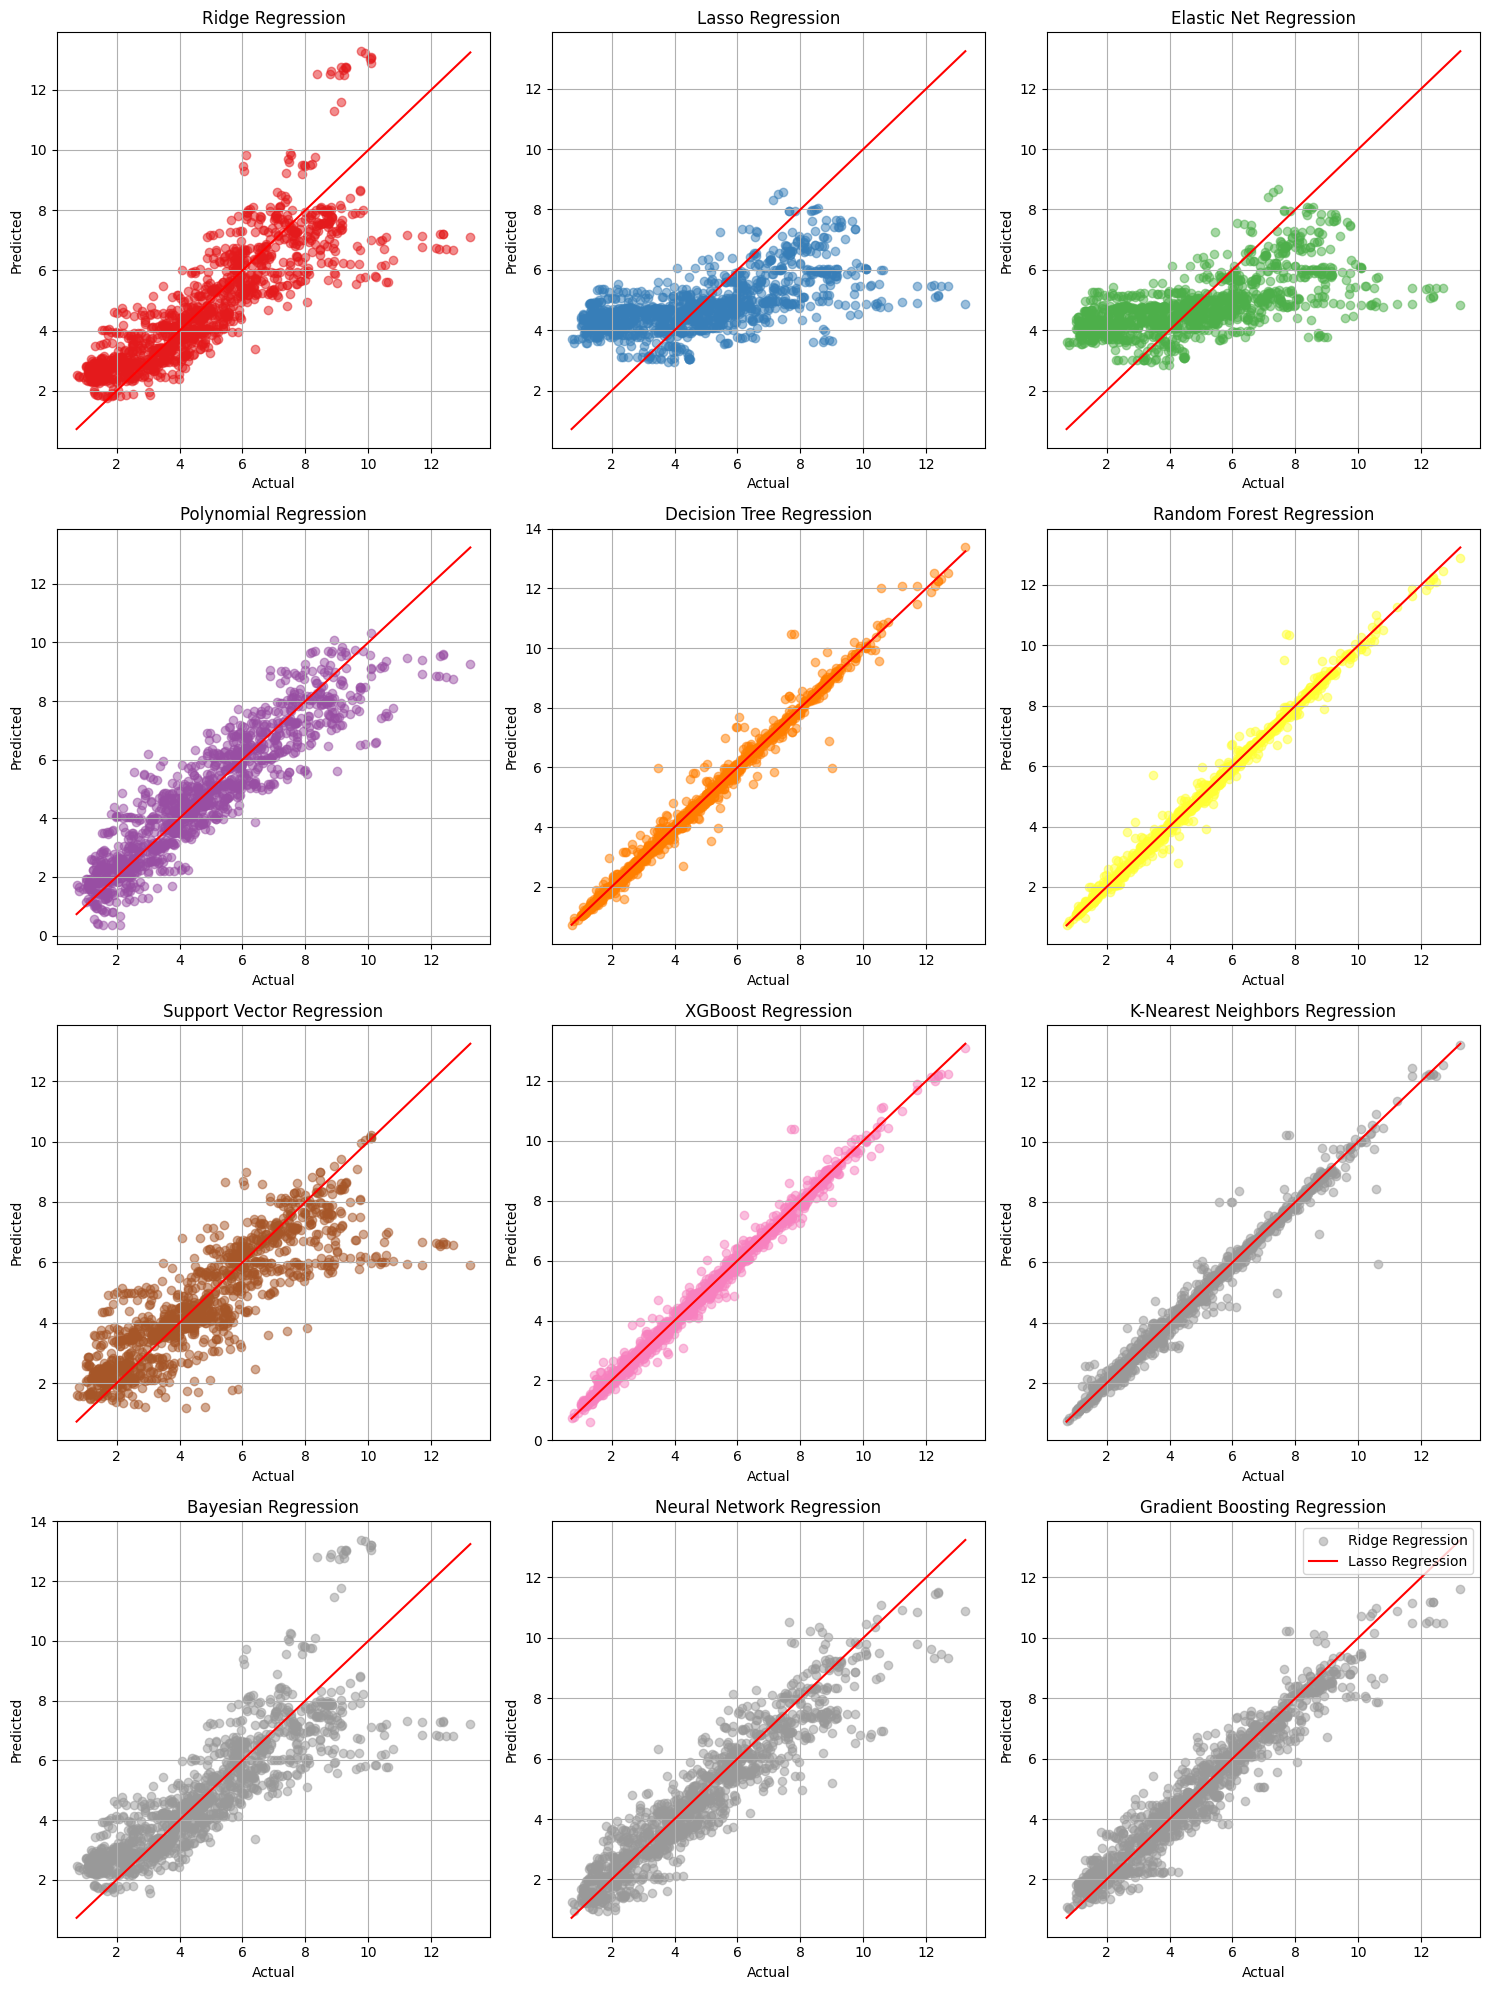

In [18]:
# Create a dictionary to store the model performance
model_performance = {
    'Ridge Regression': {'Predicted': ridge_y_pred, 'Actual': y_test},
    'Lasso Regression': {'Predicted': lasso_y_pred, 'Actual': y_test},
    'Elastic Net Regression': {'Predicted': elastic_net_y_pred, 'Actual': y_test},
    'Polynomial Regression': {'Predicted': poly_y_pred, 'Actual': y_test},
    'Decision Tree Regression': {'Predicted': tree_y_pred, 'Actual': y_test},
    'Random Forest Regression': {'Predicted': forest_y_pred, 'Actual': y_test},
    'Support Vector Regression': {'Predicted': svr_y_pred, 'Actual': y_test},
    'XGBoost Regression': {'Predicted': xgb_y_pred, 'Actual': y_test},
    'K-Nearest Neighbors Regression': {'Predicted': knn_y_pred, 'Actual': y_test},
    'Bayesian Regression': {'Predicted': bayesian_y_pred, 'Actual': y_test},
    'Neural Network Regression': {'Predicted': nn_y_pred, 'Actual': y_test},
    'Gradient Boosting Regression': {'Predicted': gb_y_pred, 'Actual': y_test}
}

# Set up figure and axes
num_models = len(model_performance)
num_rows = (num_models // 3) + (1 if num_models % 3 != 0 else 0)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

# Define color palette
color_palette = plt.cm.Set1(range(num_models))

# Iterate over the models and plot the predicted vs actual values
for i, (model, performance) in enumerate(model_performance.items()):
    row = i // 3
    col = i % 3
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Get the predicted and actual values
    y_pred = performance['Predicted']
    y_actual = performance['Actual']

    # Scatter plot of predicted vs actual values
    ax.scatter(y_actual, y_pred, color=color_palette[i], alpha=0.5, marker='o')

    # Add a diagonal line for reference
    ax.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], color='r')

    # Set the title and labels
    ax.set_title(model)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

    # Add gridlines
    ax.grid(True)

# Adjust spacing between subplots
fig.tight_layout()

# Create a legend
plt.legend(model_performance.keys(), loc='upper right')

# Show the plot
plt.show()

---
## STEP 13: IT PRINTS REGRESSION MODEL IN ORDER OF PRECISION AND A FINAL RESULT TELLING WHICH REGRESSION MODEL HAS THE MOST PRECISE VALUE AND WHICH REGRESSION MODEL HAS LEAST PRECISE VALUE

In [19]:
# Store the regression models and their scores in a dictionary
regression_scores = {
    "Ridge Regression": (ridge_mse, ridge_r2),
    "Elastic Net Regression": (elastic_net_mse, elastic_net_r2),
    "Polynomial Regression": (poly_mse, poly_r2),
    "Random Forest Regression": (forest_mse, forest_r2),
    "Gradient Boosting Regression": (gb_mse, gb_r2),
    "Decision Tree Regression": (tree_mse, tree_r2),
    "Lasso Regression": (lasso_mse, lasso_r2),
    "Support Vector Regression": (svr_mse, svr_r2),
    "XGBoost Regression": (xgb_mse, xgb_r2),
    "K-Nearest Neighbors Regression": (knn_mse, knn_r2),
    "Bayesian Regression": (bayesian_mse, bayesian_r2),
    "Neural Network Regression": (nn_mse, nn_r2),
}

# Sort the regression models based on MSE in ascending order and R-squared score in descending order
sorted_models = sorted(regression_scores.items(), key=lambda x: (x[1][0], -x[1][1]))

print("Regression Models in Order of Precision:")
for i, (model, scores) in enumerate(sorted_models, start=1):
    print(f"{i}. {model}")
    print("   Mean Squared Error (MSE):", scores[0])
    print("   R-squared Score:", scores[1])
    print()
    

most_precise_model = sorted_models[0][0]
least_precise_model = sorted_models[-1][0]

print(f"The most precise model is: {most_precise_model}")
print(f"The least precise model is: {least_precise_model}")


Regression Models in Order of Precision:
1. Random Forest Regression
   Mean Squared Error (MSE): 0.04812424937398386
   R-squared Score: 0.9917235279210805

2. XGBoost Regression
   Mean Squared Error (MSE): 0.06196520508643635
   R-squared Score: 0.9893431420451483

3. Decision Tree Regression
   Mean Squared Error (MSE): 0.08297390243902439
   R-squared Score: 0.9857300384785467

4. K-Nearest Neighbors Regression
   Mean Squared Error (MSE): 0.10967571056910567
   R-squared Score: 0.9811378261880678

5. Gradient Boosting Regression
   Mean Squared Error (MSE): 0.3985569825733834
   R-squared Score: 0.9314556428196414

6. Neural Network Regression
   Mean Squared Error (MSE): 0.7059233416532436
   R-squared Score: 0.8785943697189572

7. Polynomial Regression
   Mean Squared Error (MSE): 0.9016087100702074
   R-squared Score: 0.8449401411538542

8. Bayesian Regression
   Mean Squared Error (MSE): 1.638762105101352
   R-squared Score: 0.7181635249734428

9. Ridge Regression
   Mean Squ

In [20]:
print(sorted_models)

[('Random Forest Regression', (0.04812424937398386, 0.9917235279210805)), ('XGBoost Regression', (0.06196520508643635, 0.9893431420451483)), ('Decision Tree Regression', (0.08297390243902439, 0.9857300384785467)), ('K-Nearest Neighbors Regression', (0.10967571056910567, 0.9811378261880678)), ('Gradient Boosting Regression', (0.3985569825733834, 0.9314556428196414)), ('Neural Network Regression', (0.7059233416532436, 0.8785943697189572)), ('Polynomial Regression', (0.9016087100702074, 0.8449401411538542)), ('Bayesian Regression', (1.638762105101352, 0.7181635249734428)), ('Ridge Regression', (1.6424189657272814, 0.7175346132447258)), ('Support Vector Regression', (1.660381282767541, 0.7144454301948021)), ('Elastic Net Regression', (3.8493320735588066, 0.33798677706708036)), ('Lasso Regression', (4.005093618877548, 0.3111987004202821))]


In [21]:
model_dict = {model: values for model, values in sorted_models}
print(model_dict)


{'Random Forest Regression': (0.04812424937398386, 0.9917235279210805), 'XGBoost Regression': (0.06196520508643635, 0.9893431420451483), 'Decision Tree Regression': (0.08297390243902439, 0.9857300384785467), 'K-Nearest Neighbors Regression': (0.10967571056910567, 0.9811378261880678), 'Gradient Boosting Regression': (0.3985569825733834, 0.9314556428196414), 'Neural Network Regression': (0.7059233416532436, 0.8785943697189572), 'Polynomial Regression': (0.9016087100702074, 0.8449401411538542), 'Bayesian Regression': (1.638762105101352, 0.7181635249734428), 'Ridge Regression': (1.6424189657272814, 0.7175346132447258), 'Support Vector Regression': (1.660381282767541, 0.7144454301948021), 'Elastic Net Regression': (3.8493320735588066, 0.33798677706708036), 'Lasso Regression': (4.005093618877548, 0.3111987004202821)}


In [22]:
print(model_performance)

{'Ridge Regression': {'Predicted': array([3.102807  , 2.02835539, 5.79066314, ..., 2.45144563, 3.55592094,
       5.767205  ]), 'Actual': 2798    1.99
6132    1.27
5239    6.07
4775    1.60
4986    2.18
        ... 
5413    1.72
344     3.69
2306    2.37
911     2.52
5552    5.52
Name: DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent), Length: 1230, dtype: float64}, 'Lasso Regression': {'Predicted': array([4.18161789, 4.04157757, 4.78727824, ..., 3.9542975 , 5.08328528,
       4.49744178]), 'Actual': 2798    1.99
6132    1.27
5239    6.07
4775    1.60
4986    2.18
        ... 
5413    1.72
344     3.69
2306    2.37
911     2.52
5552    5.52
Name: DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent), Length: 1230, dtype: float64}, 'Elastic Net Regression': {'Predicted': array([3.9922697 , 4.05678382, 4.68775373, ..., 3.82265488, 5.1379482 ,
       4.46878441]), 'Actual': 2798    1.99
6132    1.27
52